### Confusion Matrix and ROC

Let us consider an application of logistic regression involving a direct mail promotion being used by Simmons Stores.

Simmons owns and operates a national chain of women's apparel stores.

5000 copies of an expensive 4-color sales catalog have been printed, and each catalog includes a coupon that provides a $50 discount on purchases of $200 or more.

The catalogs are expensive and Simmons would like to send them to only those customers who have the highest probability of using the coupon.

Management thinks that annual spending at Simmons stores and whether a customer has a Simmons credit card are two variables that might be helpful in predicting whether a customer who receives the catalog will use the coupon.

Simmons conducted a pilot study using a random sample of 50 Simmons credit card customers and 50 other customers who do not have a Simmons credit card.

Simmons sent the catalog to each of the 100 customers selected.

At the end of a test period, Simmons noted whether the customer used the coupon or not?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data Files\Simmons.xlsx')
data.head()

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0


In [3]:
# It is used to get some statistical detail
data.describe()

,Customer,Spending,Card,Coupon
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.333790,0.500000,0.400000
std,29.011492,1.741298,0.502519,0.492366
min,1.000000,1.058000,0.000000,0.000000
25%,25.750000,2.059000,0.000000,0.000000
50%,50.500000,2.805500,0.500000,0.000000
75%,75.250000,4.468250,1.000000,1.000000
max,100.000000,7.076000,1.000000,1.000000


In [4]:
# It gives unique value in particular column
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()

0    60
1    40
Name: Coupon, dtype: int64

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
x = data[['Card', 'Spending']]
y = data['Coupon'].values.reshape(-1, 1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [9]:
len(x_train), len(y_train), len(x_test), len(y_test)

(75, 75, 25, 25)

In [10]:
Lreg = LogisticRegression(solver='lbfgs')
Lreg.fit(x_train, y_train.ravel())   
# ravel() will return 1D array with all the input-array elements

LogisticRegression()

In [11]:
y_predict = Lreg.predict(x_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [12]:
y_predict_train = Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [13]:
y_prob_train = Lreg.predict_proba(x_train)[:, 1]
y_prob_train.reshape(1, -1)

array([[0.49622117, 0.32880793, 0.44329114, 0.33320924, 0.41456465,
        0.32890329, 0.3975043 , 0.66921229, 0.25844531, 0.63672372,
        0.29274386, 0.28466974, 0.5159296 , 0.41992276, 0.24342356,
        0.528514  , 0.47965107, 0.52805789, 0.33191449, 0.27457435,
        0.49179296, 0.63261616, 0.24690181, 0.47089452, 0.27842076,
        0.41663875, 0.36155602, 0.49970327, 0.23621636, 0.37860052,
        0.48809323, 0.28877877, 0.28563859, 0.37231882, 0.65309742,
        0.43807264, 0.33638478, 0.40406607, 0.23431177, 0.37282384,
        0.49970327, 0.39768396, 0.32880793, 0.25782472, 0.47393834,
        0.42878861, 0.26520939, 0.33320924, 0.54682499, 0.45446086,
        0.44326597, 0.4965167 , 0.60065954, 0.38989654, 0.49149447,
        0.27414424, 0.27785686, 0.67464141, 0.28195004, 0.48593427,
        0.38633222, 0.31373499, 0.42810085, 0.27418723, 0.44371771,
        0.41629601, 0.642004  , 0.6571001 , 0.44068025, 0.28195004,
        0.40217015, 0.43807264, 0.50977653, 0.57

In [14]:
y_prob = Lreg.predict_proba(x_test)[:, 1]
y_prob.reshape(1, -1)
y_prob

array([0.52802946, 0.49516653, 0.45703306, 0.27712052, 0.34390047,
       0.26825171, 0.27712052, 0.607686  , 0.42836534, 0.43637155,
       0.31387455, 0.23676248, 0.45703306, 0.43602768, 0.37596116,
       0.44900317, 0.46952365, 0.68521935, 0.25167254, 0.47073304,
       0.42361093, 0.56580644, 0.52792177, 0.40302605, 0.27457435])

In [15]:
x = data[['Spending', 'Card']]
y = data['Coupon']

In [16]:
import statsmodels.api as sm 
x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5


C:\Users\rpchi\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Fri, 18 Mar 2022   Pseudo R-squ.:                  0.1012
Time:                        17:51:00   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Spending       0.3416      0.129      2.655      0.008       0.089       0.594
Card           1.0987      0.445      2.471      0.013       0.227       1.970
==============================================================================
"""

#### Calculating Accuracy Score using Confusion Matrix

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predict)
score

0.76

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[15,  1],
       [ 5,  4]], dtype=int64)

In [19]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

In [20]:
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  15
False Positives:  1
False Negatives:  5
True Positives:  4


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [23]:
Accuracy = (tp + tn)/(tp + fp + fn + tn)
print('Accuracy {:0.2f}'.format(Accuracy))

Accuracy 0.76


In [24]:
Specificity = tn/(tn + fp)
print('Specificity {:0.2f}'.format(Specificity))

Specificity 0.94


In [25]:
Sensitivity = tp/(tp + fn)
print('Sensitivity {:0.2f}'.format(Sensitivity))

Sensitivity 0.44


#### ROC curve for Training Dataset

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

log_ROC_AUC1 = roc_auc_score(y_train, y_predict_train)
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_prob_train)
roc_auc1 = auc(fpr1, tpr1)

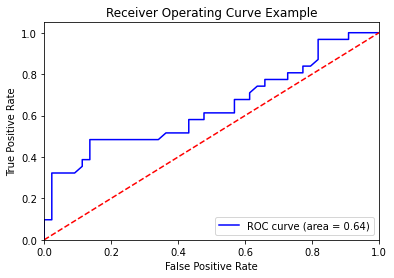

In [29]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve Example')
plt.legend(loc='lower right')
plt.show()

#### ROC Curve for Test Dataset

In [30]:
log_ROC_AUC = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

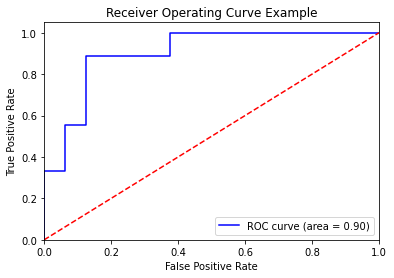

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve Example')
plt.legend(loc='lower right')
plt.show()

#### Accuracy checking for different threshold values

In [33]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1, -1), threshold=0.35)[0]
y_predict_class1

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0.])

In [34]:
# Converting the array from float data type to integer data type
y_predict_class1 = y_predict_class1.astype(int)
y_predict_class1

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0])

In [35]:
confusion_matrix_2 = confusion_matrix(y_test, y_predict_class1)
print(confusion_matrix_2)

[[8 8]
 [0 9]]


In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_class1).ravel()
print('True Negatives: ', tn)
print('False Positives: ', fp)
print('False Negatives: ', fn)
print('True Positives: ', tp)

True Negatives:  8
False Positives:  8
False Negatives:  0
True Positives:  9


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_class1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        16
           1       0.53      1.00      0.69         9

    accuracy                           0.68        25
   macro avg       0.76      0.75      0.68        25
weighted avg       0.83      0.68      0.68        25



In [38]:
from sklearn.preprocessing import binarize
y_predict_class2 = binarize(y_prob.reshape(1, -1), threshold=0.50)[0]
y_predict_class2

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0.])

In [39]:
confusion_matrix_3 = confusion_matrix(y_test, y_predict_class2)
print(confusion_matrix_3)

[[15  1]
 [ 5  4]]


In [40]:
print(classification_report(y_test, y_predict_class2))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.80      0.44      0.57         9

    accuracy                           0.76        25
   macro avg       0.78      0.69      0.70        25
weighted avg       0.77      0.76      0.74        25



In [41]:
y_predict_class3 = binarize(y_prob.reshape(1, -1), threshold=0.70)[0]
y_predict_class3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
confusion_matrix_4 = confusion_matrix(y_test, y_predict_class3)
print(confusion_matrix_4)

[[16  0]
 [ 9  0]]


In [44]:
print(classification_report(y_test, y_predict_class3))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        16
           1       0.00      0.00      0.00         9

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rpchi\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Calculating Optimal Threshold Value

In [45]:
from sklearn.metrics import roc_curve, auc

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [47]:
print('Area under ROC Curve: %f' % roc_auc)

Area under ROC Curve: 0.902778


In [48]:
import numpy as np

i = np.arange(len(tpr))     # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i), 'tpr' : pd.Series(tpr, index=i), '1-fpr' : pd.Series(1 - fpr, index=i), 'tf' : pd.Series(tpr - (1 - fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})

roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
7,0.125,0.888889,0.875,0.013889,0.457033


#### Optimal Threshold value in ROC Curve

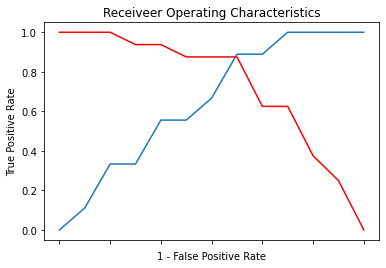

In [50]:
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color='red')
plt.xlabel('1 - False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiveer Operating Characteristics')
ax.set_xticklabels({})
plt.show()

In [52]:
y_predict_class4 = binarize(y_prob.reshape(1, -1), threshold=0.45)[0]
y_predict_class4

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0.])

In [53]:
confusion_matrix_5 = confusion_matrix(y_test, y_predict_class4)
print(confusion_matrix_5)

[[14  2]
 [ 1  8]]


In [55]:
print(classification_report(y_test, y_predict_class4))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.80      0.89      0.84         9

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.87        25
weighted avg       0.89      0.88      0.88        25

